##### Copyright 2024 Google LLC.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of qiskit-aer to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 77.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.1/164.1 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

<ipython-input-3-345acb3fd0e9>:7: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account(MY_API_TOKEN)
<ipython-input-3-345acb3fd0e9>:7: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.save_account(MY_API_TOKEN)
<ipython-input-3-345acb3fd0e9>:30: DeprecationWarning: The 'qiskit.Aer' entry point is deprecated and will be removed in Qiskit 1.0. You should use

{'10': 1000}


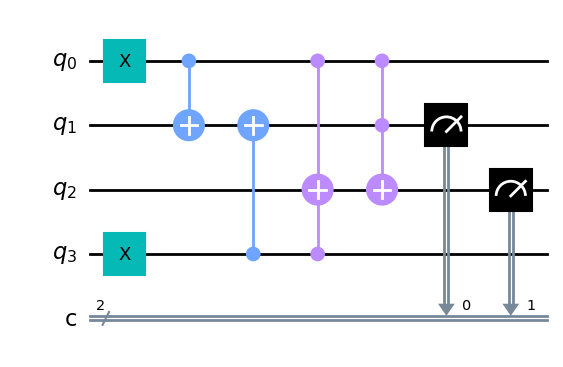

In [3]:
!pip install qiskit==0.46 qiskit-ibmq-provider pylatexenc qiskit-aer
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute
from qiskit.visualization import plot_bloch_multivector

MY_API_TOKEN = 'e44c3a32b394a3606eebb9a41b309d2a2a512dec55418805e58e600ac2638899fbc935c93739744b45a02a09d2e7dc6c3d6f3bc7764aaf61b1ae6d81faceebf6'
IBMQ.save_account(MY_API_TOKEN)

IBMQ.load_account()
q = QuantumRegister(4, 'q') # init qbits
c = ClassicalRegister(2, 'c') # init registers
qc = QuantumCircuit(q, c)

# A = 1, B = 0, X (carry in) = 1
qc.x(q[0])
qc.x(q[3])

# sum
qc.cx(q[0], q[1])
qc.cx(q[3], q[1])

# rule transfer
qc.ccx(q[0], q[3], q[2])
qc.ccx(q[0], q[1], q[2])

qc.measure(q[1], c[0])
qc.measure(q[2], c[1])

# Выполнение на симуляторе
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
result = job.result()
counts = result.get_counts()
print(counts)

# Визуализация схемы
qc.draw(output='mpl')

# Gemini API Python quickstart

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://ai.google.dev/tutorials/quickstart_colab"><img src="https://ai.google.dev/static/site-assets/images/docs/notebook-site-button.png" height="32" width="32" />View on Google AI</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

This tutorial shows you how to get started with the Gemini API using the Python SDK.

## Prerequisites

You can run this tutorial in Google Colab, which doesn't require additional environment configuration.

Alternatively, to complete this quickstart locally, see the Python guidance in [Get started with the Gemini API](https://ai.google.dev/tutorials/quickstart).

## Install the SDK

The Python SDK for the Gemini API is contained in the [`google-generativeai`](https://pypi.org/project/google-generativeai/) package. Install the dependency using pip:

In [ ]:
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.4/137.4 kB 1.1 MB/s eta 0:00:00


## Set up your API key

To use the Gemini API, you'll need an API key. If you don't already have one, create a key in Google AI Studio.

<a class="button" href="https://aistudio.google.com/app/apikey" target="_blank" rel="noopener noreferrer">Get an API key</a>

In Colab, add the key to the secrets manager under the "🔑" in the left panel. Give it the name `GOOGLE_API_KEY`. Then pass the key to the SDK:

In [ ]:
# Import the Python SDK
import google.generativeai as genai
# Used to securely store your API key
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

## Initialize the Generative Model

Before you can make any API calls, you need to initialize the Generative Model.

In [ ]:
model = genai.GenerativeModel('gemini-pro')

## Generate text

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute
from qiskit.visualization import plot_bloch_multivector

MY_API_TOKEN = 'e44c3a32b394a3606eebb9a41b309d2a2a512dec55418805e58e600ac2638899fbc935c93739744b45a02a09d2e7dc6c3d6f3bc7764aaf61b1ae6d81faceebf6'
IBMQ.save_account(MY_API_TOKEN)

IBMQ.load_account()
q = QuantumRegister(4, 'q') # init qbits
c = ClassicalRegister(2, 'c') # init registers
qc = QuantumCircuit(q, c)

# A = 1, B = 0, X (carry in) = 1
qc.x(q[0])
qc.x(q[3])

# sum
qc.cx(q[0], q[1])
qc.cx(q[3], q[1])

# rule transfer
qc.ccx(q[0], q[3], q[2])
qc.ccx(q[0], q[1], q[2])

qc.measure(q[1], c[0])
qc.measure(q[2], c[1])

# Выполнение на симуляторе
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
result = job.result()
counts = result.get_counts()
print(counts)

# Визуализация схемы
qc.draw(output='mpl')

ModuleNotFoundError: No module named 'qiskit'

## What's next

To learn more about working with the Gemini API, see the [Python tutorial](https://ai.google.dev/tutorials/python_quickstart).

If you're new to generative AI models, you might want to look at the
[concepts guide](https://ai.google.dev/docs/concepts) and the
[Gemini API overview](https://ai.google.dev/docs/gemini_api_overview).